In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from math import pi

from src.pre_processing import *

/Users/monicacoyarzun/Galvanize/Galvanize_DSI/capstone/Emotrak/src/pre_processing.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  subset['responseLagSeconds'] = subset['responseLagSeconds'].fillna(subset['responseLagSeconds'].mode()[0])
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

In [2]:
pd.set_option('display.max_columns', 999)

### Create subset and fill NaN's

In [3]:
subset = create_subset(public_df, cols_to_keep)

In [4]:
# fill with mode b/c of outliers (7.0 mode vs 7101 mean)
subset['responseLagSeconds'] = subset['responseLagSeconds'].fillna(subset['responseLagSeconds'].mode()[0])

# fill with 0's because categorical and we're dummifying trigger data anyways; and 0 is mode of workPilingUp

subset[['generalTrigger', 'specificTrigger', 'workPilingUp']] = subset[['generalTrigger', 'specificTrigger', 'workPilingUp']].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [5]:
# fill remaining null's with mean (dailyAlertNumber and tiredness) - they are close to the mode.

subset.fillna(subset.mean(), inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Dummify categoricals

In [6]:
subset.head()

,responseLagSeconds,dailyAlertNumber,tiredness,feelingEmotion,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp
0,2044.0,2.0,0.500000,1,enjoyment,peaceful,0.50,wellbeing,exercise,0.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,7642.0,2.0,0.465404,1,fear,anxious,0.25,workStress,workload,0.50,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,90.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,1330.0,4.0,0.465404,1,anger,frustrated,0.25,socialStress,soChallenge,0.25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,73.0,1.0,0.465404,1,enjoyment,happy,0.50,socialSupport,timeFamily,0.50,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,56.0,2.0,0.465404,1,enjoyment,happy,0.50,wellbeing,play,0.50,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [7]:
for col in cols_to_dummify:
    dummify_clustering(subset, col)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
subset.head()

,responseLagSeconds,dailyAlertNumber,tiredness,feelingEmotion,intensity,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,anger,enjoyment,fear,other,sadness,afraid,angry,annoyed,anxious,ashamed,discouraged,embarrassed,enthusiastic,excited,frustrated,happy,irritated,joyful,lonely,nervous,notListed,peaceful,sad,worried,0,personalConcerns,socialStress,socialSupport,wellbeing,workSatisfaction,workStress,world,bodyImage,clientChallenge,clientEnjoyable,climateChange,colleagueChallenge,colleagueEnjoyable,dislikeJob,domesticPolitics,exercise,familyChallenge,financialStress,friendsChallenge,globalPolitics,healthProblems,healthcare,lackMotivation,paperwork,patientChallenge,patientEnjoyable,play,productivity,relaxation,sleepDeprived,soChallenge,spiritual,success,timeFamily,timeFriends,timeSO,workload
0,2044.0,2.0,0.500000,1,0.50,0.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7642.0,2.0,0.465404,1,0.25,0.50,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,90.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1330.0,4.0,0.465404,1,0.25,0.25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,73.0,1.0,0.465404,1,0.50,0.50,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,56.0,2.0,0.465404,1,0.50,0.50,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Scale data and PCA

In [9]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(subset)
scaled_subset = scaler.transform(subset)


In [10]:
scaled_subset

array([[0.18360191, 0.25      , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.18409864, 0.25      , 0.46540388, ..., 0.        , 0.        ,
        1.        ],
       [0.18353855, 0.75      , 0.46540388, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18449164, 0.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.75      , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.18342116, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
svd = TruncatedSVD(n_components=8, n_iter=7)
X_svd = svd.fit_transform(scaled_subset)

In [12]:
svd.singular_values_

array([129.61289475,  67.46710749,  45.19613331,  43.08881898,
        39.9462158 ,  38.44074146,  34.93315517,  33.75559159])

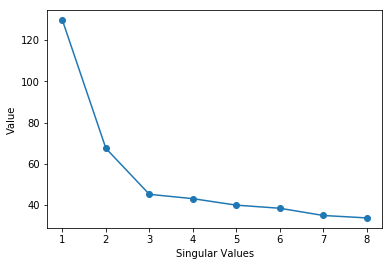

In [13]:
s = svd.singular_values_

x = [i+1 for i in range(len(s))]
plt.plot(x, s, marker='o')
plt.xlabel("Singular Values")
plt.ylabel("Value");

### kMeans Model after PCA

In [14]:
kmeans = KMeans(n_clusters=9, random_state=10)
predictions = kmeans.fit_predict(X_svd)
predictions

array([3, 2, 8, ..., 5, 1, 5], dtype=int32)

In [15]:
np.unique(predictions, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
 array([854, 818, 676, 936, 705, 974, 928, 733, 802]))

In [16]:
np.unique(predictions == 1, return_counts=True)[1][1]

818

In [17]:
silhouette_score(X_svd, predictions, metric='euclidean')

0.3813365008055482

### Plot Silhouettes

In [18]:
X = X_svd
range_n_clusters = range(2,10)

# taken from sklearn
def plot_silhouette(X):
    
    for n_clusters in range_n_clusters:
        fig, (ax1) = plt.subplots(1)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
        silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean')
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.26585473701019563


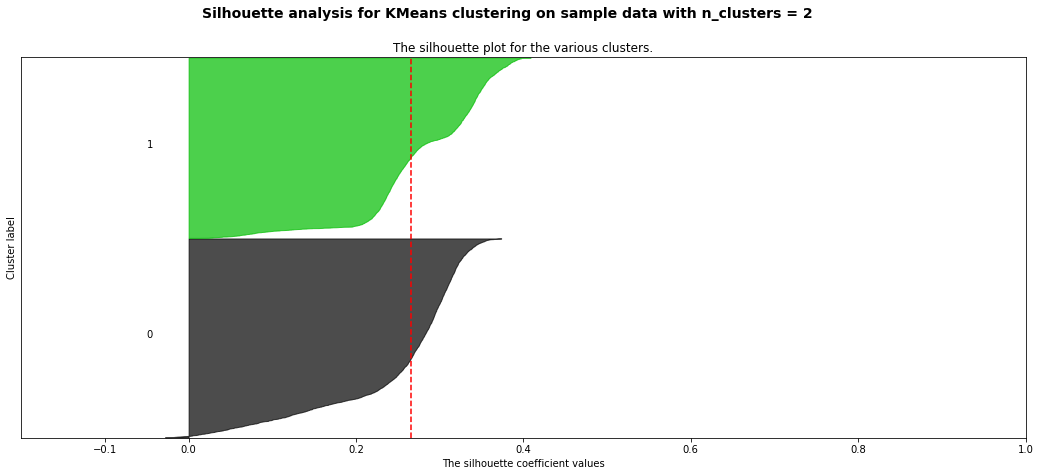

For n_clusters = 3 The average silhouette_score is : 0.2823263357827445


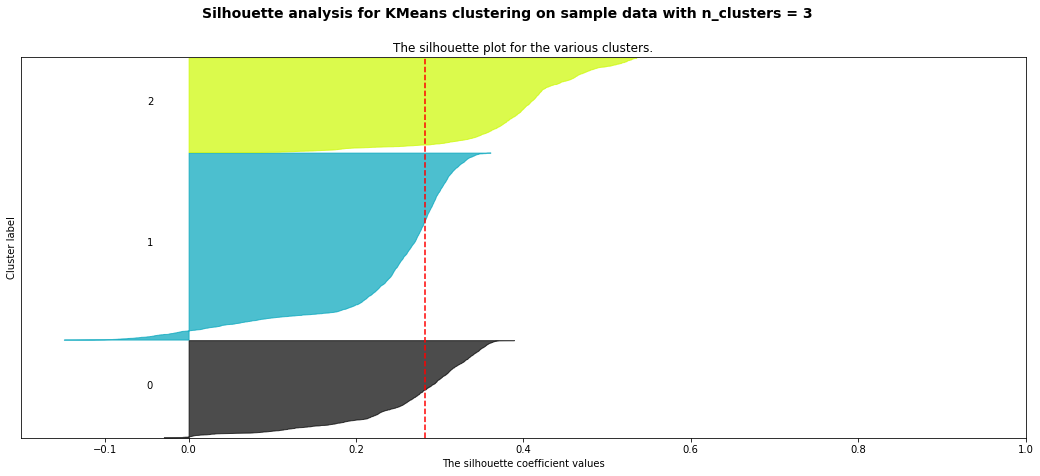

For n_clusters = 4 The average silhouette_score is : 0.2883612108030108


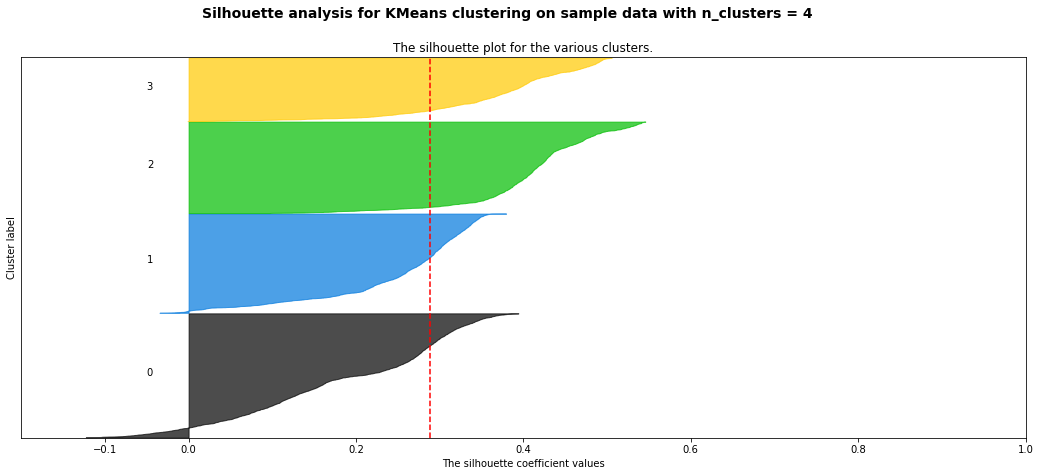

For n_clusters = 5 The average silhouette_score is : 0.3496171039807244


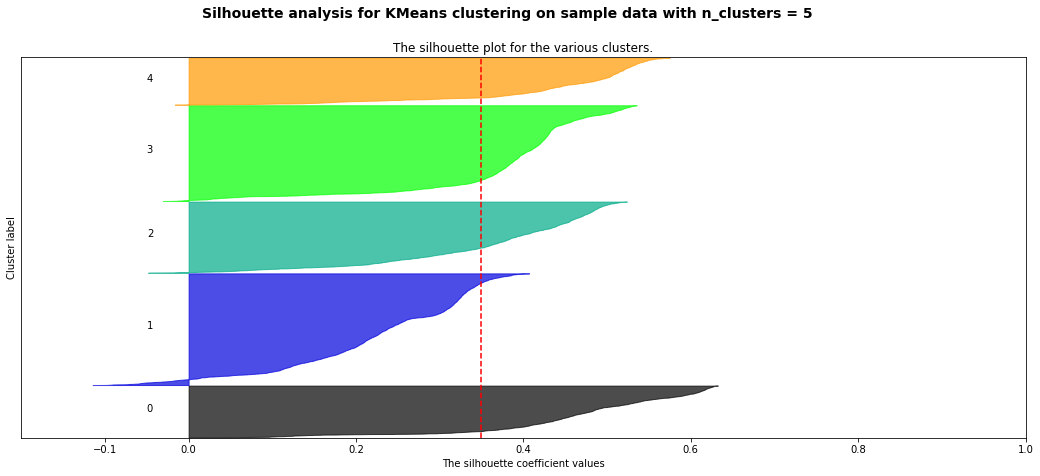

For n_clusters = 6 The average silhouette_score is : 0.36183876170275014


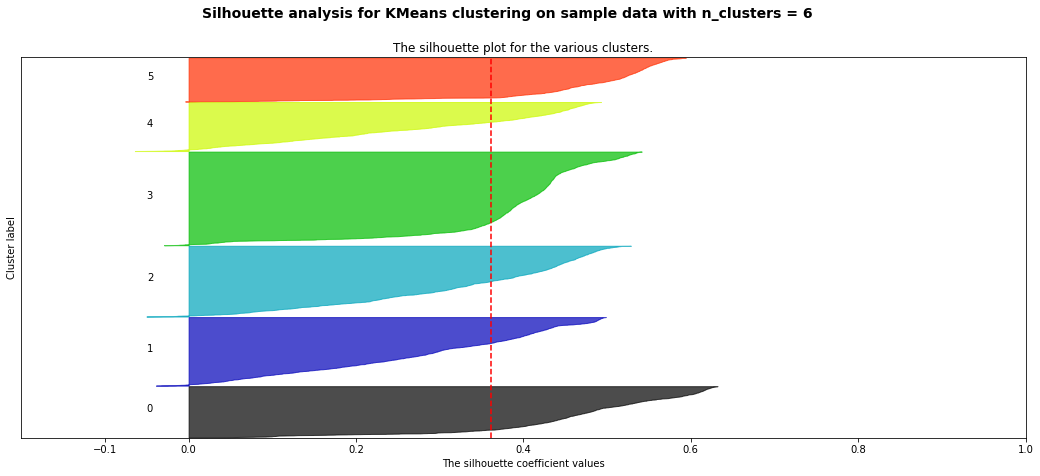

For n_clusters = 7 The average silhouette_score is : 0.35984729276004473


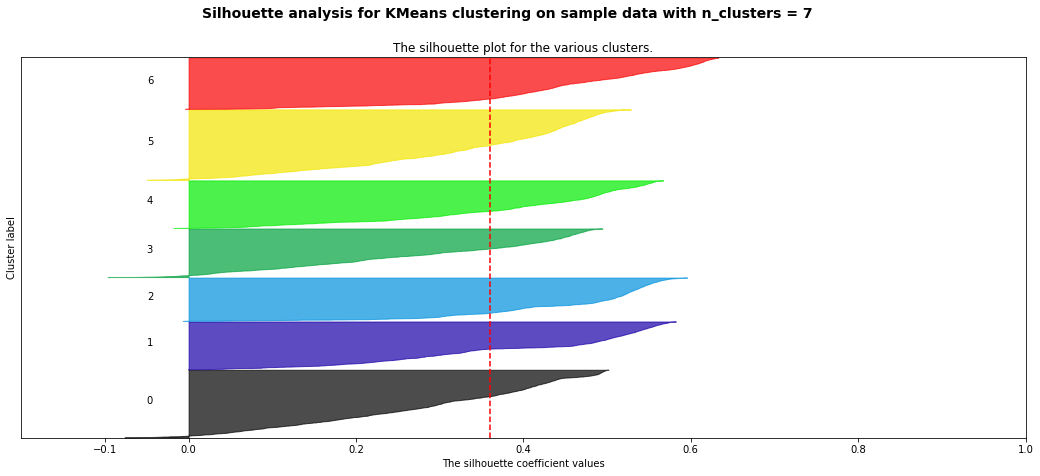

For n_clusters = 8 The average silhouette_score is : 0.36676415973159043


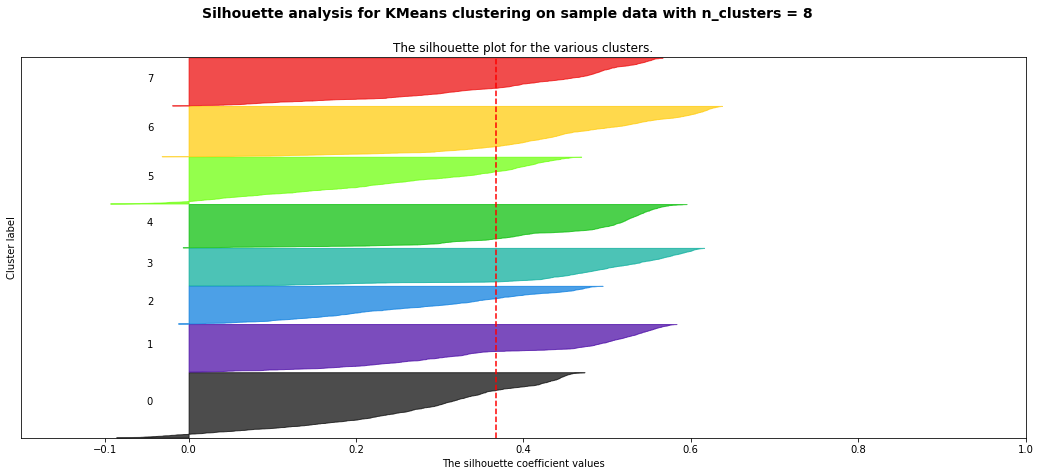

For n_clusters = 9 The average silhouette_score is : 0.3813365008055482


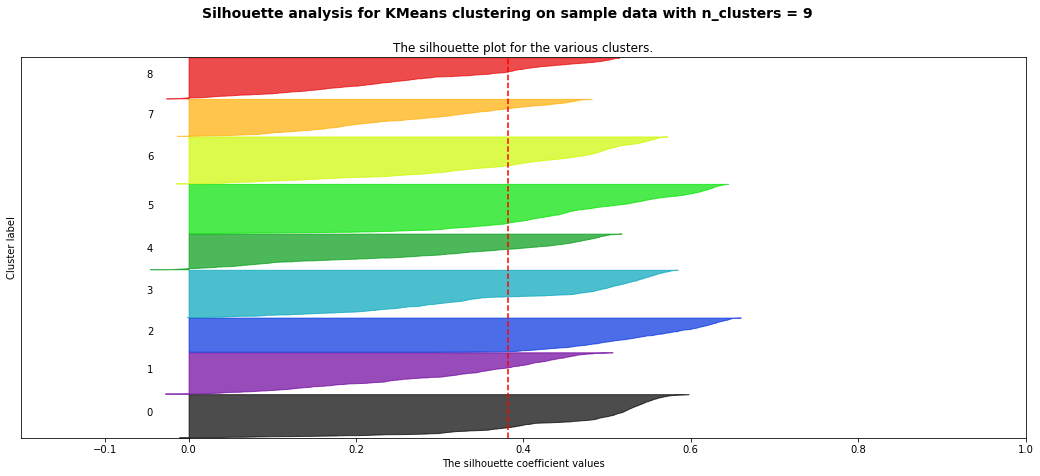

In [19]:
plot_silhouette(X)

### Check key features and add labels to dataframe

In [20]:
centroids = svd.inverse_transform(kmeans.cluster_centers_)
centroids[0]

array([ 1.78412350e-01,  3.23598180e-01,  4.73557101e-01,  6.83169937e-01,
        5.47271162e-01,  2.92856000e-01,  2.19008041e-02,  2.93013378e-02,
        1.29627136e-02,  1.09747328e-02,  2.91973331e-02,  6.11592299e-02,
        3.47627189e-03,  6.47803199e-03,  3.15573810e-02,  6.84937925e-03,
        6.17673999e-03,  5.42055307e-03,  2.73155455e-03,  7.29036743e-03,
        7.08322403e-03,  7.32735637e-03,  4.85030559e-01,  6.55035783e-02,
        2.98685569e-02,  5.02166176e-02,  2.65694056e-02,  7.11034159e-02,
        1.79056018e-02,  1.04706662e-01,  3.71079646e-02,  2.51993914e-02,
        4.47561353e-03,  4.55374102e-03,  0.00000000e+00,  1.46792379e-01,
        2.63196833e-02,  9.32863129e-01,  1.44307127e-02,  1.52560647e-02,
        1.90264374e-02,  1.67178617e-03,  1.83350316e-03,  8.86457466e-03,
        1.23238145e-02,  1.34026054e-03, -9.29680052e-03,  8.39608877e-04,
        2.41609908e-02,  8.82046503e-02,  4.78656928e-03,  4.41112555e-01,
        1.08350362e-02,  

In [21]:
top_centroids = np.argsort(centroids)[:, -1:-11:-1]

In [22]:
top_centroids

array([[63, 37,  3,  4, 22,  2, 51, 94, 95,  1],
       [66, 36,  3,  4, 22,  2,  5, 97, 35,  1],
       [38, 66,  3, 44, 97, 22,  4,  5,  2, 35],
       [37, 64, 57,  3,  4,  2, 89, 22, 87,  1],
       [22, 40,  4,  3, 62,  5, 35,  2,  1, 58],
       [65, 37,  3,  2,  4, 88, 22,  5, 48, 57],
       [64, 37,  3, 87,  4,  2, 51, 22,  5,  1],
       [ 3, 38, 44,  5,  4, 22, 62,  2,  1, 35],
       [ 3, 36,  4,  5, 62,  2,  1, 50, 52, 43]])

In [23]:
for i in range(9):
    print ('Cluster', i+1, 'total: ', np.unique(predictions == i, return_counts=True)[1][1])
    print (subset[predictions == i].iloc[:, top_centroids[i]].columns)
    print ()

Cluster 1 total:  854
Index(['socialSupport', 'enjoyment', 'feelingEmotion', 'intensity',
       'emotionDuration', 'tiredness', 'happy', 'timeFamily', 'timeFriends',
       'dailyAlertNumber'],
      dtype='object')

Cluster 2 total:  818
Index(['workStress', 'anger', 'feelingEmotion', 'intensity', 'emotionDuration',
       'tiredness', 'bodySensationIntensity', 'workload', 'workPilingUp',
       'dailyAlertNumber'],
      dtype='object')

Cluster 3 total:  676
Index(['fear', 'workStress', 'feelingEmotion', 'anxious', 'workload',
       'emotionDuration', 'intensity', 'bodySensationIntensity', 'tiredness',
       'workPilingUp'],
      dtype='object')

Cluster 4 total:  936
Index(['enjoyment', 'wellbeing', 'peaceful', 'feelingEmotion', 'intensity',
       'tiredness', 'relaxation', 'emotionDuration', 'play',
       'dailyAlertNumber'],
      dtype='object')

Cluster 5 total:  705
Index(['emotionDuration', 'sadness', 'intensity', 'feelingEmotion',
       'socialStress', 'bodySensationI

In [24]:
# for i in top_centroids:
subset[predictions == 0].iloc[:, top_centroids[0]].describe()

,socialSupport,enjoyment,feelingEmotion,intensity,emotionDuration,tiredness,happy,timeFamily,timeFriends,dailyAlertNumber
count,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.00000,854.000000,854.000000,854.000000
mean,0.983607,0.934426,0.687354,0.555035,41.861827,0.485889,0.38993,0.367681,0.367681,2.237664
std,0.127057,0.247681,0.463843,0.201949,33.682012,0.215884,0.48802,0.482457,0.482457,0.975771
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,0.500000,15.000000,0.250000,0.00000,0.000000,0.000000,2.000000
50%,1.000000,1.000000,1.000000,0.500000,30.000000,0.500000,0.00000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,1.000000,0.750000,90.000000,0.500000,1.00000,1.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,1.00000,1.000000,1.000000,5.000000


In [25]:
subset[predictions == 1].iloc[:, top_centroids[1]].describe()

,workStress,anger,feelingEmotion,intensity,emotionDuration,tiredness,bodySensationIntensity,workload,workPilingUp,dailyAlertNumber
count,818.0,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,1.0,0.622249,0.716381,0.518337,35.429095,0.429193,0.402506,0.355746,1.281174,1.978393
std,0.0,0.485121,0.451030,0.230347,31.819957,0.219875,0.307072,0.479032,1.337406,0.899622
min,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,0.000000,0.000000,0.250000,15.000000,0.250000,0.000000,0.000000,0.000000,1.000000
50%,1.0,1.000000,1.000000,0.500000,30.000000,0.465404,0.500000,0.000000,1.000000,2.000000
75%,1.0,1.000000,1.000000,0.750000,60.000000,0.500000,0.750000,1.000000,2.000000,2.081392
max,1.0,1.000000,1.000000,1.000000,90.000000,1.000000,1.000000,1.000000,4.000000,5.000000


In [27]:
subset[predictions == 2].iloc[:, top_centroids[2]].describe()

,fear,workStress,feelingEmotion,anxious,workload,emotionDuration,intensity,bodySensationIntensity,tiredness,workPilingUp
count,676.0,676.0,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,1.0,1.0,0.761834,0.597633,0.551775,43.973373,0.473373,0.458210,0.438327,1.492604
std,0.0,0.0,0.426276,0.490738,0.497680,34.328339,0.223261,0.289013,0.217198,1.313724
min,1.0,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,1.000000,0.000000,0.000000,15.000000,0.250000,0.250000,0.250000,0.000000
50%,1.0,1.0,1.000000,1.000000,1.000000,30.000000,0.500000,0.500000,0.465404,1.000000
75%,1.0,1.0,1.000000,1.000000,1.000000,90.000000,0.500000,0.750000,0.500000,2.000000
max,1.0,1.0,1.000000,1.000000,1.000000,90.000000,1.000000,1.000000,1.000000,4.000000


In [28]:
subset[predictions == 3].iloc[:, top_centroids[3]].describe()

,enjoyment,wellbeing,peaceful,feelingEmotion,intensity,tiredness,relaxation,emotionDuration,play,dailyAlertNumber
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.979701,0.917735,0.939103,0.617521,0.512821,0.471029,0.479701,37.463675,0.290598,2.128416
std,0.141097,0.274915,0.239270,0.486252,0.192704,0.230628,0.499855,30.952176,0.454281,0.973616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,0.000000,0.500000,0.250000,0.000000,15.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,0.000000,30.000000,0.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,0.750000,0.500000,1.000000,60.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,5.000000


In [29]:
subset[predictions == 4].iloc[:, top_centroids[4]].describe()

,emotionDuration,sadness,intensity,feelingEmotion,socialStress,bodySensationIntensity,workPilingUp,tiredness,dailyAlertNumber,sad
count,705.000000,705.000000,705.000000,705.000000,705.00000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,56.736170,0.831206,0.577305,0.702128,0.49078,0.413121,1.241135,0.358448,2.174880,0.358865
std,34.503971,0.374836,0.241067,0.457648,0.50027,0.316432,1.316961,0.210406,1.066583,0.480008
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,15.000000,1.000000,0.500000,0.000000,0.00000,0.000000,0.000000,0.250000,1.000000,0.000000
50%,60.000000,1.000000,0.500000,1.000000,0.00000,0.500000,1.000000,0.250000,2.000000,0.000000
75%,90.000000,1.000000,0.750000,1.000000,1.00000,0.750000,2.000000,0.500000,3.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000,5.000000,1.000000


In [30]:
subset[predictions == 5].iloc[:, top_centroids[5]].describe()

,workSatisfaction,enjoyment,feelingEmotion,tiredness,intensity,productivity,emotionDuration,bodySensationIntensity,enthusiastic,peaceful
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,0.982546,0.893224,0.733060,0.549277,0.530801,0.431211,36.952772,0.324435,0.253593,0.217659
std,0.131022,0.308987,0.442588,0.221494,0.196516,0.495500,30.946491,0.286253,0.435291,0.412866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.465404,0.500000,0.000000,15.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.500000,0.500000,0.000000,30.000000,0.250000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.750000,0.750000,1.000000,60.000000,0.500000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,1.000000,1.000000


In [31]:
subset[predictions == 6].iloc[:, top_centroids[6]].describe()

,wellbeing,enjoyment,feelingEmotion,play,intensity,tiredness,happy,emotionDuration,bodySensationIntensity,dailyAlertNumber
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,0.996767,0.857759,0.732759,0.686422,0.589170,0.556812,0.447198,37.148707,0.361800,2.142291
std,0.056796,0.349486,0.442758,0.464197,0.199605,0.238409,0.497472,31.684622,0.306066,0.976875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,0.000000,0.500000,0.465404,0.000000,15.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,0.000000,30.000000,0.500000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,0.750000,0.750000,1.000000,60.000000,0.500000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,5.000000


In [32]:
subset[predictions == 7].iloc[:, top_centroids[7]].describe()

,feelingEmotion,fear,anxious,bodySensationIntensity,intensity,emotionDuration,socialStress,tiredness,dailyAlertNumber,workPilingUp
count,733.000000,733.0,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,0.735334,1.0,0.467940,0.464188,0.529673,45.544338,0.383356,0.431212,2.089009,1.005457
std,0.441456,0.0,0.499312,0.295105,0.240367,35.665642,0.486536,0.231532,1.001899,1.198803
min,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.0,0.000000,0.250000,0.250000,15.000000,0.000000,0.250000,1.000000,0.000000
50%,1.000000,1.0,0.000000,0.500000,0.500000,30.000000,0.000000,0.465404,2.000000,1.000000
75%,1.000000,1.0,1.000000,0.750000,0.750000,90.000000,1.000000,0.500000,3.000000,2.000000
max,1.000000,1.0,1.000000,1.000000,1.000000,90.000000,1.000000,1.000000,5.000000,4.000000


In [33]:
subset[predictions == 8].iloc[:, top_centroids[8]].describe()

,feelingEmotion,anger,intensity,bodySensationIntensity,socialStress,tiredness,dailyAlertNumber,frustrated,irritated,annoyed
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,0.714464,0.894015,0.514963,0.408354,0.418953,0.414423,2.166951,0.236908,0.258105,0.234414
std,0.451951,0.308011,0.244338,0.320714,0.493695,0.225905,1.044747,0.425451,0.437865,0.423896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.250000,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.500000,0.500000,0.000000,0.465404,2.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.750000,0.750000,1.000000,0.500000,3.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000


In [34]:
subset['label'] = pd.Series(predictions, index=subset.index)

In [35]:
subset['label'].value_counts()

5    974
3    936
6    928
0    854
1    818
8    802
7    733
4    705
2    676
Name: label, dtype: int64

### Scatter plots

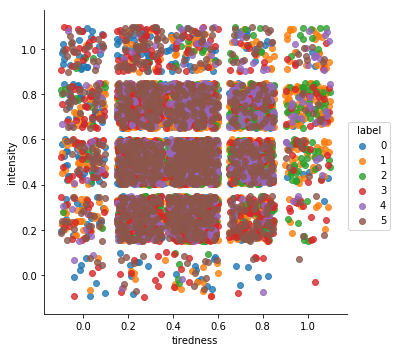

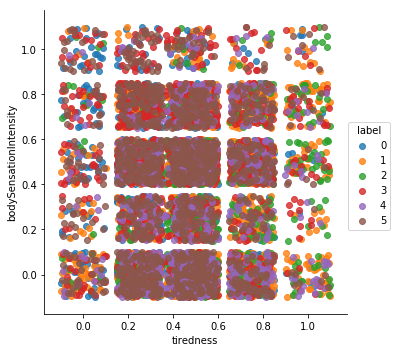

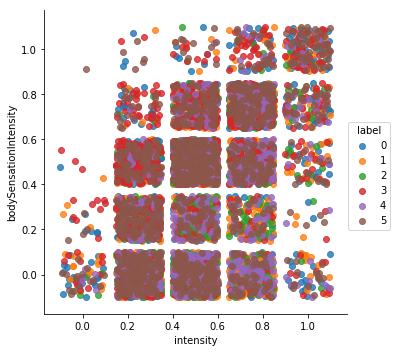

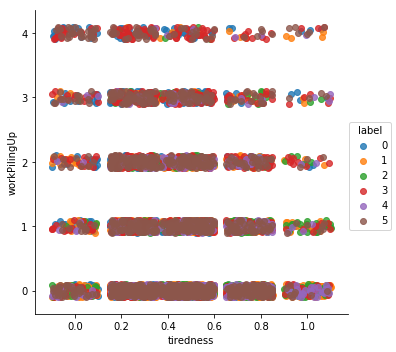

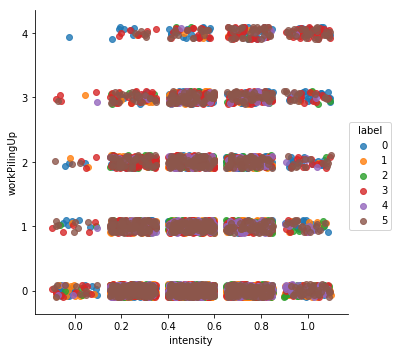

In [35]:
facet = sns.lmplot(data=subset, x='tiredness', y='intensity', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
facet2 = sns.lmplot(data=subset, x='tiredness', y='bodySensationIntensity', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
# facet3 = sns.lmplot(data=test_subset, x='tiredness', y='emotionDuration', hue='label', 
#                    fit_reg=False, legend=True, legend_out=True, x_jitter=0, y_jitter=0)
facet4 = sns.lmplot(data=subset, x='intensity', y='bodySensationIntensity', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
facet5 = sns.lmplot(data=subset, x='tiredness', y='workPilingUp', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=.1)
facet6 = sns.lmplot(data=subset, x='intensity', y='workPilingUp', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)

### Swarm Plots

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


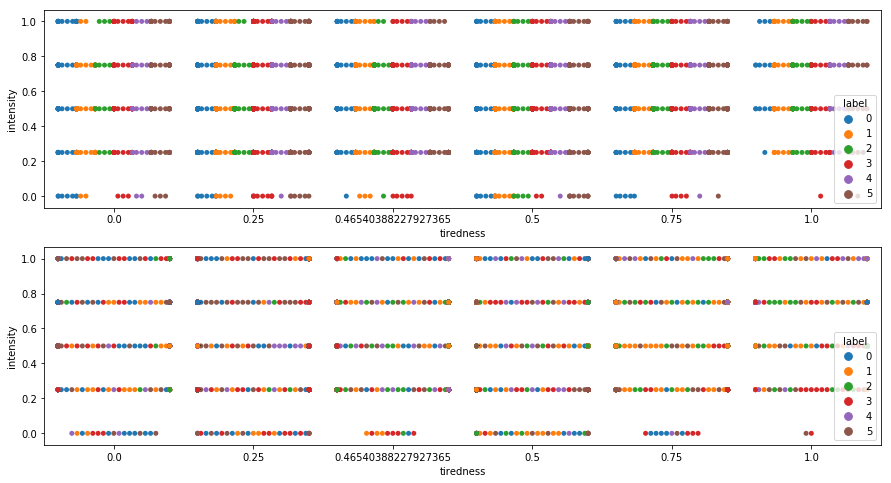

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
# for i in range(6):
sns.swarmplot(x='tiredness', y='intensity', hue='label', split=True, data=subset, ax=ax[0]);
sns.swarmplot(x='tiredness', y='intensity', hue='label', data=subset, ax=ax[1]);

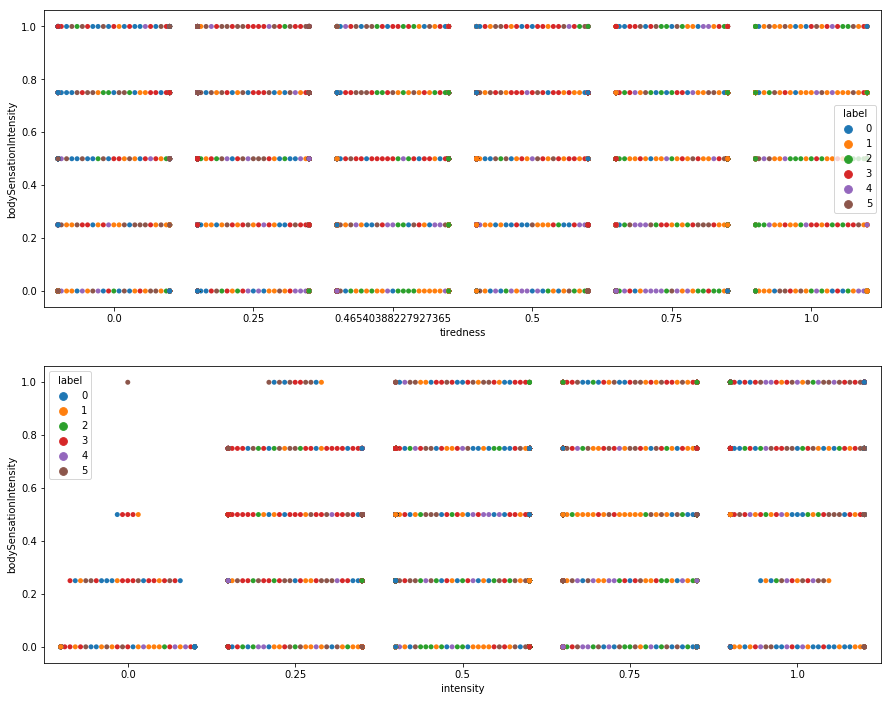

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12))
# for i in range(6):
sns.swarmplot(x='tiredness', y='bodySensationIntensity', hue='label', data=subset, ax=ax[0]);
sns.swarmplot(x='intensity', y='bodySensationIntensity', hue='label', data=subset, ax=ax[1]);

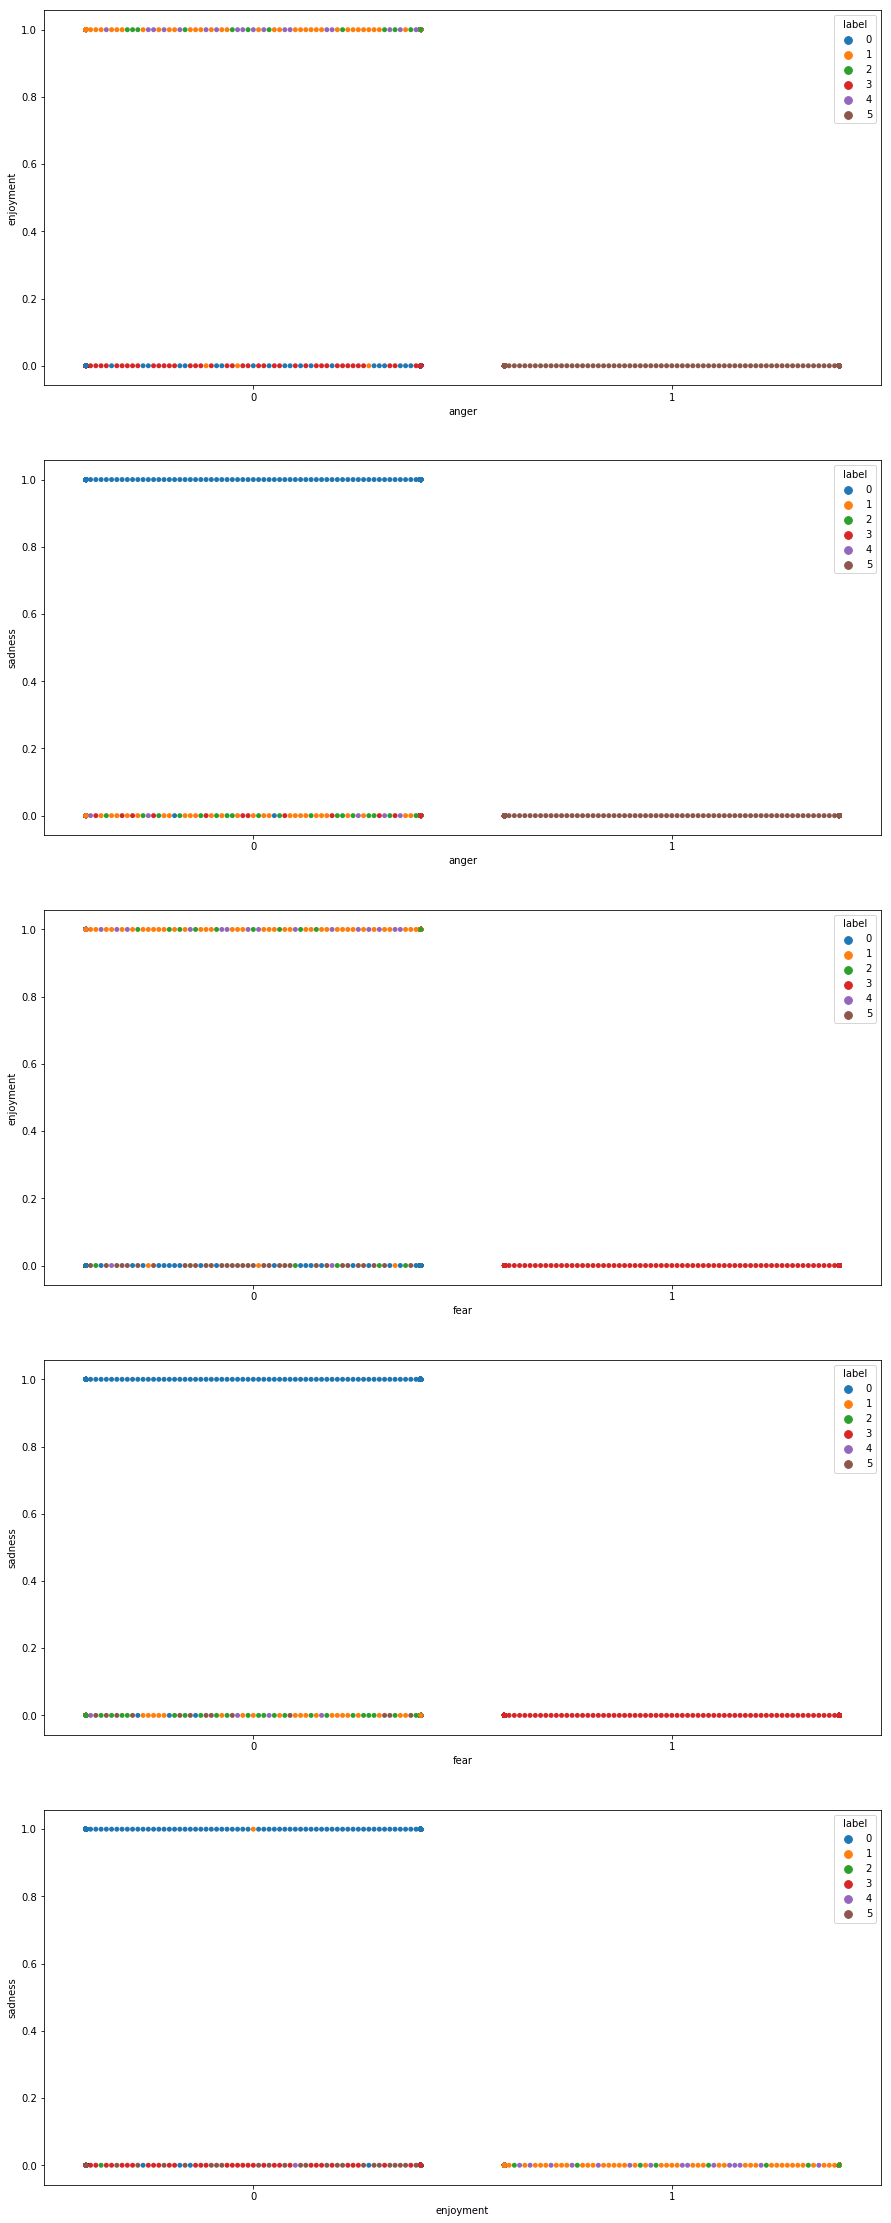

In [38]:
fig, ax = plt.subplots(5, 1, figsize=(15, 40))

emotions1 = ['anger', 'fear', 'enjoyment']
emotions2 = ['enjoyment', 'sadness']
num = 0

for e1 in emotions1:
    for e2 in emotions2:
        if e1 == e2:
            continue
        else:
            sns.swarmplot(x=e1, y=e2, hue='label', data=subset, ax=ax[num]);
            num += 1

# for i in range(6):
#     sns.swarmplot(x='intensity', y='bodySensationIntensity', data=test_subset[predictions == i], ax=ax[i]);

In [38]:
for num in range(9):
    print ('cluster', num, 'count:', (subset[subset['label'] == num]).shape)
    

cluster 0 count: (854, 99)
cluster 1 count: (818, 99)
cluster 2 count: (676, 99)
cluster 3 count: (936, 99)
cluster 4 count: (705, 99)
cluster 5 count: (974, 99)
cluster 6 count: (928, 99)
cluster 7 count: (733, 99)
cluster 8 count: (802, 99)


In [39]:
subset[predictions == 0].iloc[:, top_centroids[0]].describe()

,socialSupport,enjoyment,feelingEmotion,intensity,emotionDuration,tiredness,happy,timeFamily,timeFriends,dailyAlertNumber
count,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.00000,854.000000,854.000000,854.000000
mean,0.983607,0.934426,0.687354,0.555035,41.861827,0.485889,0.38993,0.367681,0.367681,2.237664
std,0.127057,0.247681,0.463843,0.201949,33.682012,0.215884,0.48802,0.482457,0.482457,0.975771
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,0.500000,15.000000,0.250000,0.00000,0.000000,0.000000,2.000000
50%,1.000000,1.000000,1.000000,0.500000,30.000000,0.500000,0.00000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,1.000000,0.750000,90.000000,0.500000,1.00000,1.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,1.00000,1.000000,1.000000,5.000000


### Radar Charts

In [40]:
# col_list must begin with 'label' category to define clusters
scaler_radar = StandardScaler()
def prep_for_radar(df, col_list):
    df = df[col_list]
    clusters = df.iloc[:, 0].values
    df.drop(['label'], axis=1, inplace=True)
    scaler.fit(df)
    X = scaler.transform(df)
    return df, X, clusters

In [41]:
cols = ['label', 'anger', 'enjoyment', 'sadness', 'fear', 'intensity']
cols2 = ['label', 'intensity', 'emotionDuration', 'sadness', 'fear', 'enjoyment', 'anger']
cols3 = ['label', 'intensity', 'emotionDuration', 'bodySensationIntensity', 'sadness', 'fear', 'enjoyment', 'anger']
cols4 = ['label', 'tiredness', 'intensity', 'emotionDuration', 'bodySensationIntensity', 'workPilingUp']

In [42]:
df1, X1, clusters1 = prep_for_radar(subset, cols)
df2, X2, clusters2 = prep_for_radar(subset, cols2)
df3, X3, clusters3 = prep_for_radar(subset, cols3)
df4, X4, clusters4 = prep_for_radar(subset, cols4)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
np.unique(X3, return_counts=True)

(array([0.        , 0.04494382, 0.15730337, 0.25      , 0.3258427 ,
        0.5       , 0.66292135, 0.75      , 1.        ]),
 array([25761,  1359,  1468,  2708,  1384,  5561,   991,  3338,  9412]))

In [45]:
clusters1

array([3, 2, 8, ..., 5, 1, 5], dtype=int32)

In [56]:
# function to plot radar graph; modified slightly from Elliot's post (https://medium.com/@Saslow/high-dimensionality-visualization-in-python-65790a4b1719)
def plot_radar(df, X, clusters):
    #number of variables
    categories=list(df)
    N = len(categories)

    #Define the preset angles for your graph
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    #create axis
    ax = plt.subplot(111, polar=True)

    # change the xticks and y ticks
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    plt.yticks([2,4,6], ["2","4","6"], color="grey", size=7)
    ax.set_rlabel_position(0)
    
    for i in range(9):
        #Get the mean values on all features from specific cluster
        values = X[clusters == i].mean(axis = 0)

        #add value to the end so that the fill will work correctly
        values = np.append(values, values[:1])

        #Plot the values
        ax.plot(angles, values, linewidth=1, linestyle='solid')

        # Fill area
        ax.fill(angles, values, alpha=0.2, label = 'Cluster {}'.format(i+1))

    plt.legend(bbox_to_anchor=(1, 1),
               bbox_transform=plt.gcf().transFigure)
    plt.title('Emotion Clusters on Radar Graph');
    plt.subplots_adjust(hspace=.8)

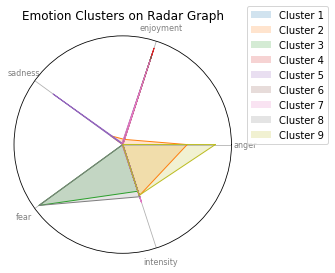

In [57]:
plot_radar(df1, X1, clusters1)

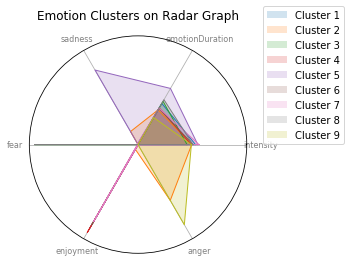

In [58]:
plot_radar(df2, X2, clusters2)

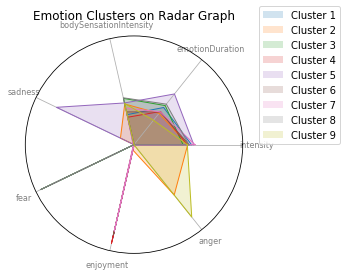

In [59]:
plot_radar(df3, X3, clusters3)

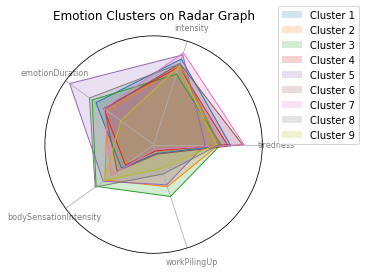

In [60]:
plot_radar(df4, X4, clusters4)

In [92]:
def plot_radars(df, X, clusters):
    # number of variable
    categories=list(df)
    N = len(categories)

    #Define the preset angles for your graph
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    plt.figure(figsize=(14,14))

    for i in range(9):

        ax = plt.subplot(3,3,i+1, polar=True)
        values = X[clusters == i].mean(axis = 0)
        values = np.append(values, values[:1])
        plt.xticks(angles[:-1], categories, color='grey', size=10)
        plt.yticks([2,4,6], ["2","4","6"], color="grey", size=7)
        ax.plot(angles, values, linewidth=1, linestyle='solid')
        ax.fill(angles, values, alpha=0.2)
        plt.title('Cluster {}'.format(i+1));

    ax.set_rlabel_position(0)   
    plt.subplots_adjust(hspace=.8)

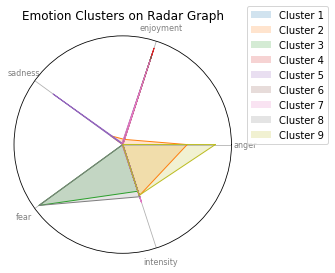

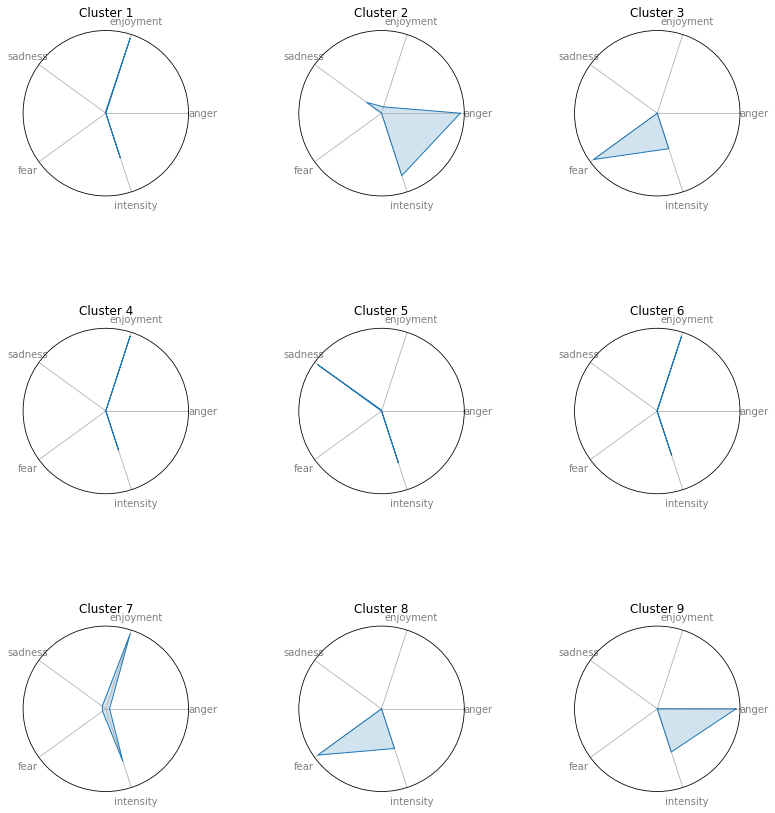

In [93]:
plot_radar(df1, X1, clusters1)
plot_radars(df1, X1, clusters1)

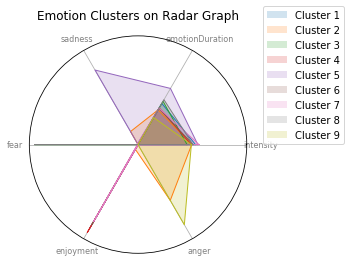

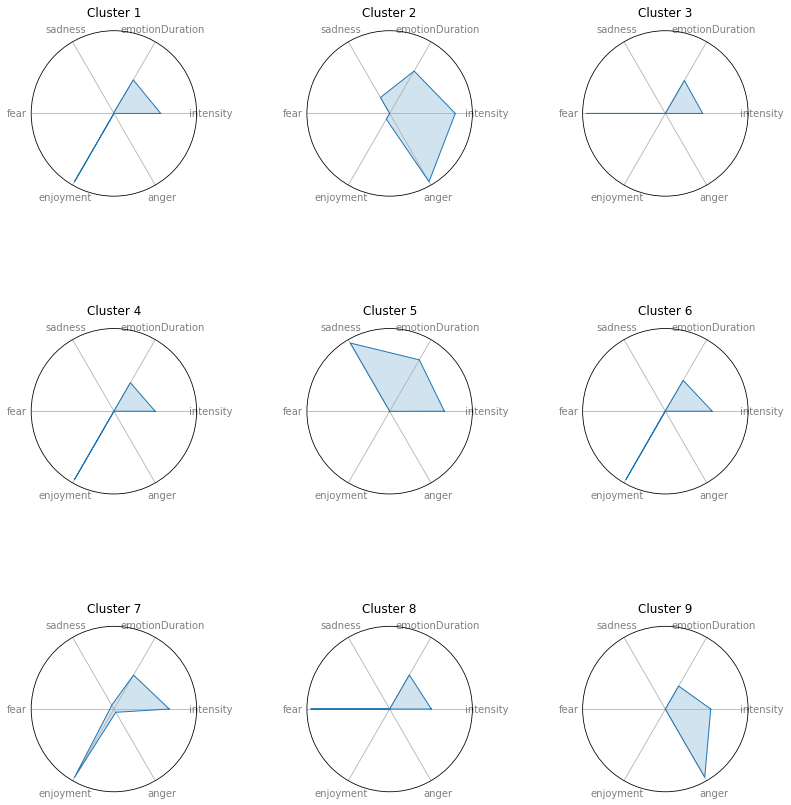

In [94]:
plot_radar(df2, X2, clusters2)
plot_radars(df2, X2, clusters2)

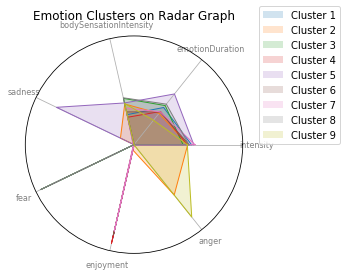

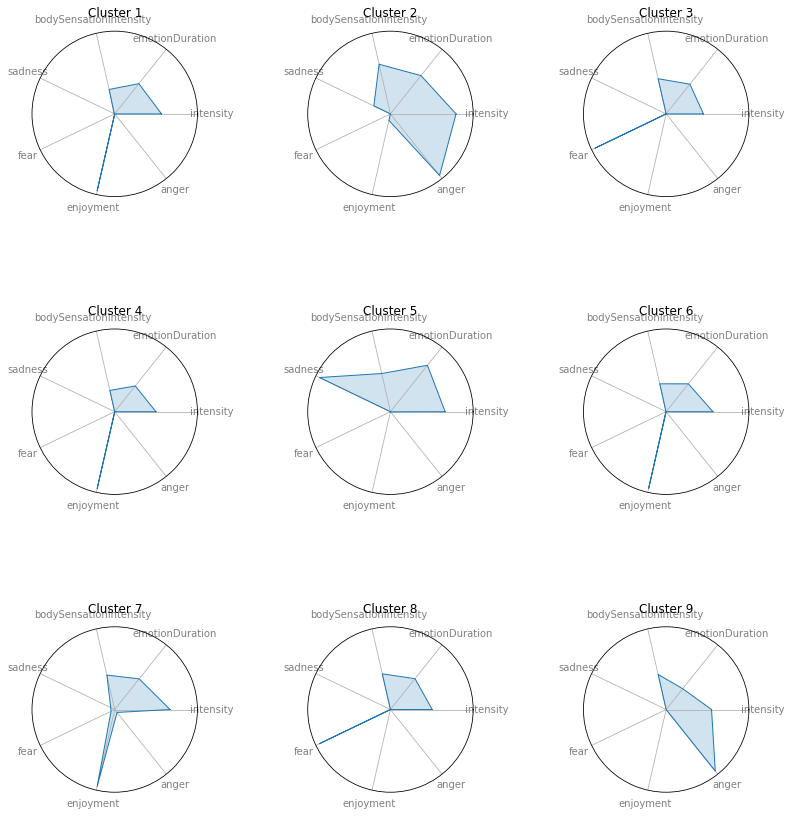

In [95]:
plot_radar(df3, X3, clusters3)
plot_radars(df3, X3, clusters3)

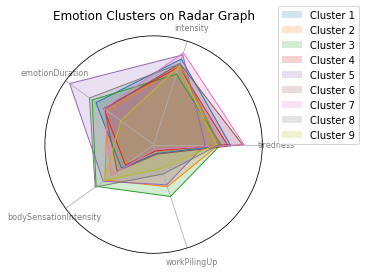

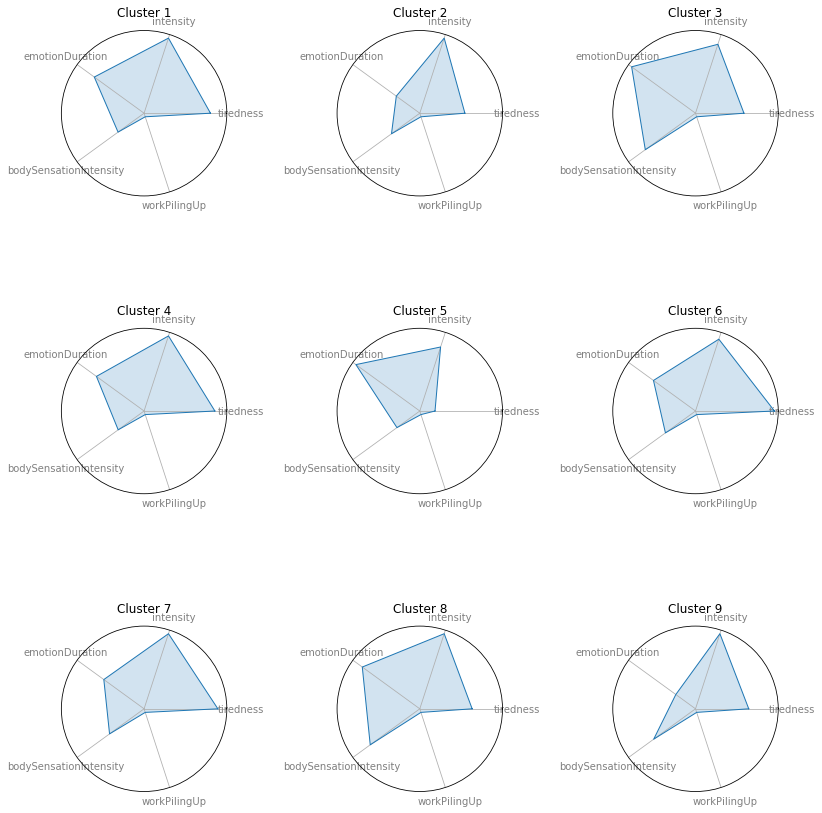

In [96]:
plot_radar(df4, X4, clusters4)
plot_radars(df4, X4, clusters4)